## Sample GCM aerosol data at aerosol observation stations

Questions to answer:
Using model variables that describe the concentration of aerosols by type, can we see similarities to the size distribution data?
What are the differences between NorESM and CESM, which treat marine organic aerosol differently? Can we attribute any differences to the aerosol parametrizations?

Regular imports. Set a directory where output files will be saved.

In [1]:
from imports import (plt, np, xr, pd)
from functions import select_from_netcdf, select_loc_to_pandas

base_dir = '/home/notebook/basics/saved_data/'
start_date = '2000-01-01'; end_date = '2010-01-01' # Set start and end dates

In [2]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
# Dictionary with the coords of relevant observatories
obs_dict = {'Zeppelin': [78.907206, 11.885593], 
            'ALERT':[82.450825, -62.507651 + 360], 
            'Nord':[81.613342, -16.652660 + 360], 
            'Tiksi':[71.6, 128.9], 
            'Barrow':[71.300659, -156.719390 + 360]}

Add data file locations, and store them in a dictionary keyed by the common variable name. Notice that the time intervals for these history files are very different.

In [4]:
mmrso4_pt='~/shared-cmip6-for-ns1000k/historical/CESM2-WACCM/r1i1p1f1/mmrso4_AERmon_CESM2-WACCM_historical_r1i1p1f1_gn_185001-201412.nc'
mmrss_pt='~/shared-cmip6-for-ns1000k/historical/CESM2-WACCM/r1i1p1f1/mmrss_AERmon_CESM2-WACCM_historical_r1i1p1f1_gn_185001-201412.nc'
mmrsoa_pt='~/shared-cmip6-for-ns1000k/historical/CESM2-WACCM/r1i1p1f1/mmrsoa_AERmon_CESM2-WACCM_historical_r1i1p1f1_gn_185001-201412.nc'
mmroa_pt='~/shared-cmip6-for-ns1000k/historical/CESM2-WACCM/r1i1p1f1/mmroa_AERmon_CESM2-WACCM_historical_r1i1p1f1_gn_185001-201412.nc'

dryso4_pt='~/shared-cmip6-for-ns1000k/historical/CESM2-WACCM/r1i1p1f1/dryso4_AERmon_CESM2-WACCM_historical_r1i1p1f1_gn_185001-201412.nc'
data_paths_cesm = {'mmrso4':mmrso4_pt, 
              'mmrss':mmrss_pt, 
              'mmrsoa':mmrsoa_pt, 
              'mmroa':mmroa_pt}

In [5]:
mmroa_path1 = '~/shared-cmip6-for-ns1000k/historical/NorESM2-LM/r1i1p1f1/mmroa_AERmon_NorESM2-LM_historical_r1i1p1f1_gn_200001-200912.nc'
mmrso4_path1 = '~/shared-cmip6-for-ns1000k/historical/NorESM2-LM/r1i1p1f1/mmrso4_AERmon_NorESM2-LM_historical_r1i1p1f1_gn_200001-200912.nc'
mmrbc_path1 = '~/shared-cmip6-for-ns1000k/historical/NorESM2-LM/r1i1p1f1/mmrbc_AERmon_NorESM2-LM_historical_r1i1p1f1_gn_200001-200912.nc'
mmrss_path1 = '~/shared-cmip6-for-ns1000k/historical/NorESM2-LM/r1i1p1f1/mmrss_AERmon_NorESM2-LM_historical_r1i1p1f1_gn_200001-200912.nc'
mmrsoa_path1 = '~/shared-cmip6-for-ns1000k/historical/NorESM2-LM/r1i1p1f1/mmrsoa_AERmon_NorESM2-LM_historical_r1i1p1f1_gn_200001-200912.nc'

data_paths_noresm = {'mmrso4':mmrso4_path1, 
                    'mmrss':mmrss_path1, 
                    'mmrsoa':mmrsoa_path1, 
                    'mmroa':mmroa_path1}

Save CESM data for each variable for the lowest level of the atmosphere during the 2000-2010 period, and calculating monthly averages.

In [6]:
all_cesm = xr.Dataset()
date_range = (start_date, end_date)
print('Processing...')
for i in data_paths_cesm: # for each GCM variable of interest
    _ma = select_from_netcdf(data_paths_cesm[i], var = i, lev_ind = 69, date_range = date_range, time_avg = 'time.month')
    all_cesm[i] = _ma

Processing...


/opt/conda/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'mmrso4' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  use_cftime=use_cftime,


mmrso4 selected


/opt/conda/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'mmrss' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  use_cftime=use_cftime,


mmrss selected


/opt/conda/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'mmrsoa' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  use_cftime=use_cftime,


mmrsoa selected


/opt/conda/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'mmroa' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  use_cftime=use_cftime,


mmroa selected


Save NorESM data for each variable for the lowest level of the atmosphere during the 2000-2010 period, and calculating monthly averages.

In [7]:
all_noresm = xr.Dataset()
date_range = (start_date, end_date)
print('Processing...')
for i in data_paths_noresm: # for each GCM variable of interest, calculate monthly
    _ma = select_from_netcdf(data_paths_noresm[i], var = i, lev_ind = 0, date_range = date_range, time_avg = 'time.month')
    all_noresm[i] = _ma

Processing...
mmrso4 selected
mmrss selected
mmrsoa selected
mmroa selected


Create an empty dataframe object and read variable into it (for CESM)

In [8]:
df = pd.DataFrame()
for obs in obs_dict: #
    _df = select_loc_to_pandas(all_cesm, obs_dict[obs])
    _df['Station name']=obs # Create a new column with the station for all new vals
    df = pd.concat([df, _df], ) # Add

df = df.reset_index()

Create an empty dataframe object and read variable into it (for NorESM)

In [9]:
df2 = pd.DataFrame()
for obs in obs_dict: #
    _df = select_loc_to_pandas(all_noresm, obs_dict[obs])
    _df['Station name']=obs # Create a new column with the station for all new vals
    df2 = pd.concat([df2, _df], ) # Add

df2 = df2.reset_index()

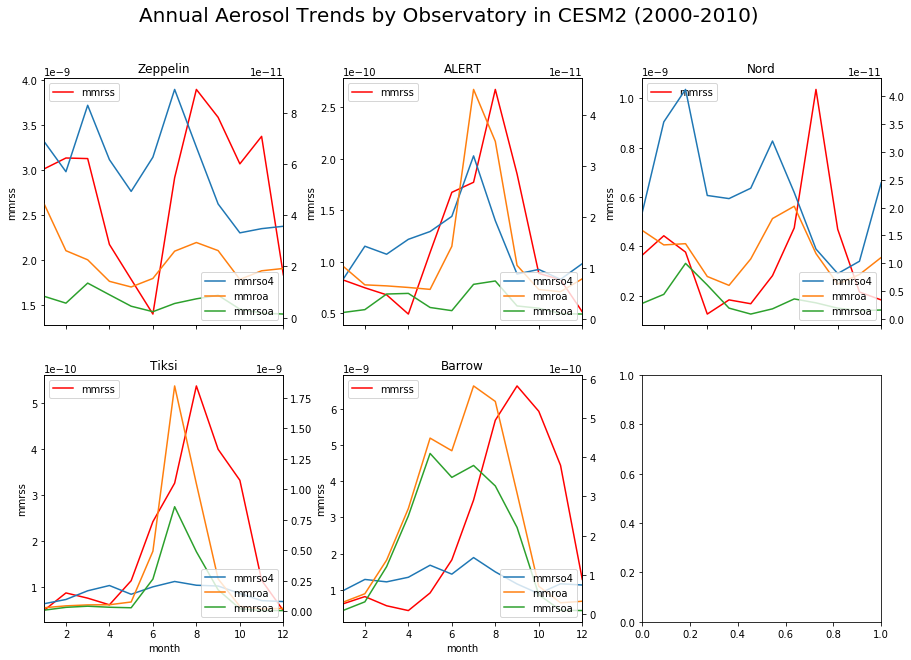

In [10]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15,10));
for ax, obs in zip(axs.flatten(), obs_dict):
#    df[df['Station name']==obs].plot(x='month', y=['so4','mmrss','mmroa','mmrsoa'], ax=ax)
    df[df['Station name']==obs].plot(x='month', y=['mmrss'], ax=ax, color='r')
    ax.set_ylabel('mmrss')
    ax.legend(loc = 'upper left')
    ax_alt = ax.twinx()
    df[df['Station name']==obs].plot(x='month', y=['mmrso4','mmroa','mmrsoa'], ax=ax_alt)
    ax.set_title(obs)
    ax_alt.legend(loc = 'lower right')
    #df[['so4','mmrss','mmroa','mmrsoa']].plot(x='month',ax = ax)#, label = vals)
fig.suptitle('Annual Aerosol Trends by Observatory in CESM2 (2000-2010)', fontsize=20);
plt.subplots_adjust(wspace=0.25)#, hspace=0.3)

In [11]:
filename = "cesm2_aero_obs_2000_2010"
fig.savefig(base_dir + filename  + '.pdf')
fig.clf()

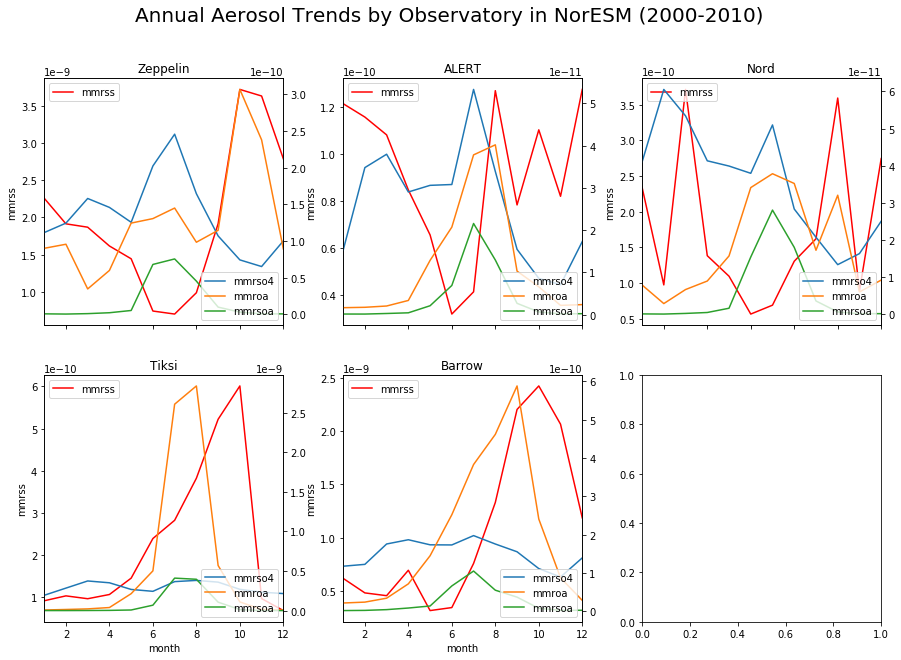

In [12]:
fig2, axs2 = plt.subplots(nrows=2, ncols=3, figsize=(15,10));
for ax, obs in zip(axs2.flatten(), obs_dict):
#    df[df['Station name']==obs].plot(x='month', y=['so4','mmrss','mmroa','mmrsoa'], ax=ax)
    df2[df2['Station name']==obs].plot(x='month', y=['mmrss'], ax=ax, color='r')
    ax.set_ylabel('mmrss')
    ax.legend(loc = 'upper left')
    ax_alt = ax.twinx()
    df2[df2['Station name']==obs].plot(x='month', y=['mmrso4','mmroa','mmrsoa'], ax=ax_alt)
    ax.set_title(obs)
    ax_alt.legend(loc = 'lower right')
    #df[['so4','mmrss','mmroa','mmrsoa']].plot(x='month',ax = ax)#, label = vals)
fig2.suptitle('Annual Aerosol Trends by Observatory in NorESM (2000-2010)', fontsize=20);
plt.subplots_adjust(wspace=0.25)#, hspace=0.3)

In [13]:
filename = "noresm_aero_obs_2000_2010"
fig2.savefig(base_dir + filename  + '.pdf')
fig2.clf()

Text(0.07,0.5,'Organic Aerosol MMR (kg/kg)')

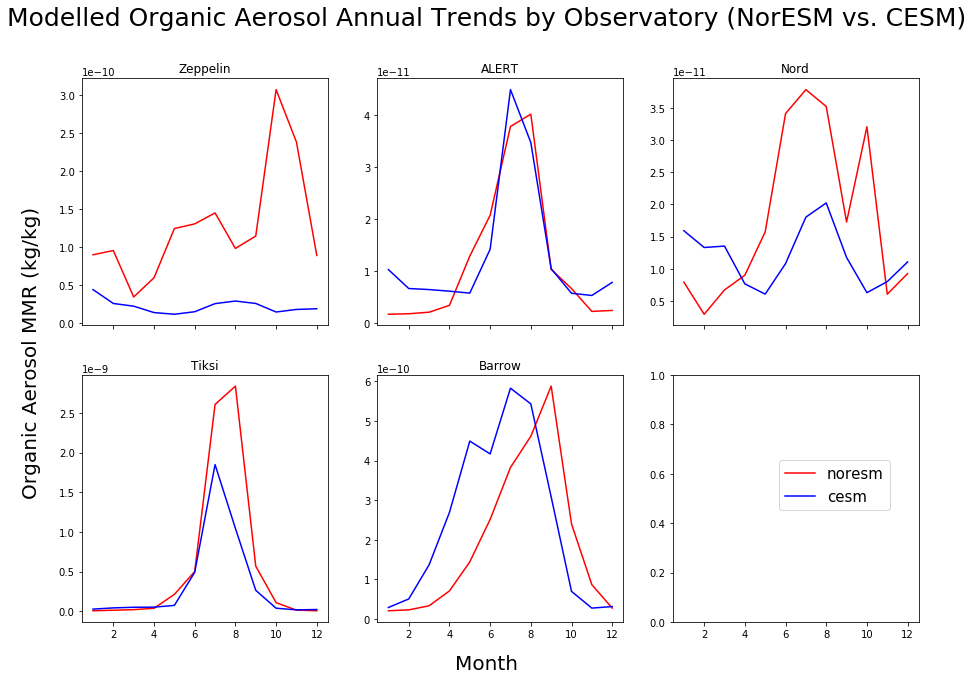

In [14]:
fig3, axs3 = plt.subplots(nrows=2, ncols=3, figsize=(15,10), sharex = True);
for ax, obs in zip(axs3.flatten(), obs_dict):
    temp_coords = obs_dict[obs]
    _ob_noresm = all_noresm['mmroa'].sel(lat=temp_coords[0], lon=temp_coords[1], method='nearest')
    _ob_cesm = all_cesm['mmroa'].sel(lat=temp_coords[0], lon=temp_coords[1], method='nearest')
    _ob_noresm.plot(ax=ax, color='r', label = 'noresm')
    _ob_cesm.plot(ax=ax, color='b', label = 'cesm')
    ax.set_title(obs)
#    ax.set_ylabel('Organic Aerosol (kg/kg)')
    ax.set_ylabel('')
    ax.set_xlabel('')
fig3.legend(['noresm','cesm'], loc = [0.8,0.25], fontsize = 15)
fig3.suptitle('Modelled Organic Aerosol Annual Trends by Observatory (NorESM vs. CESM)', fontsize=25);

fig3.text(0.5, 0.06, 'Month', ha='center', fontsize=20)
fig3.text(0.07, 0.5, 'Organic Aerosol MMR (kg/kg)', va='center', rotation='vertical', fontsize=20)

In [15]:
filename = "oa_obs_comparison_2000_2010.png"
plt.savefig(base_dir + filename,format = 'png', dpi = 400)
plt.clf()

<Figure size 432x288 with 0 Axes>

These show terrible agreement. I wonder if it is a problem, or just that they assign different values to primary and secondary organic aerosol.

Text(0.07,0.5,'Secondary Organic Aerosol MMR (kg/kg)')

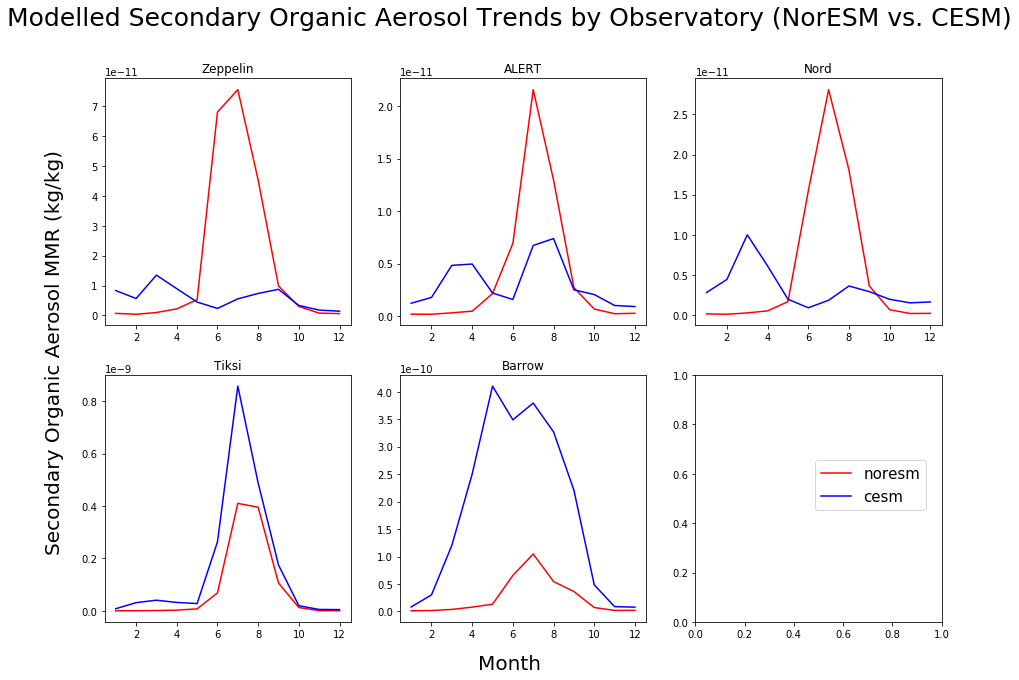

In [16]:
fig4, axs4 = plt.subplots(nrows=2, ncols=3, figsize=(15,10));
for ax, obs in zip(axs4.flatten(), obs_dict):
    temp_coords = obs_dict[obs]
    _ob_noresm = all_noresm['mmrsoa'].sel(lat=temp_coords[0], lon=temp_coords[1], method='nearest')
    _ob_cesm = all_cesm['mmrsoa'].sel(lat=temp_coords[0], lon=temp_coords[1], method='nearest')
    _ob_noresm.plot(ax=ax, color='r', label = 'noresm')
    _ob_cesm.plot(ax=ax, color='b', label = 'cesm')
    ax.set_title(obs)
#    ax.set_ylabel('Secondary Organic Aerosol (kg/kg)')
    ax.set_ylabel('')
    ax.set_xlabel('')
fig4.legend(['noresm','cesm'], loc = [0.8,0.25], fontsize = 15)
fig4.suptitle('Modelled Secondary Organic Aerosol Trends by Observatory (NorESM vs. CESM)', fontsize=25);

fig4.text(0.5, 0.06, 'Month', ha='center', fontsize=20)
fig4.text(0.07, 0.5, 'Secondary Organic Aerosol MMR (kg/kg)', va='center', rotation='vertical', fontsize=20)

In [17]:
filename = "soa_obs_comparison_2000_2010.png"
plt.savefig(base_dir + filename,format = 'png', dpi = 400)
plt.clf()

<Figure size 432x288 with 0 Axes>

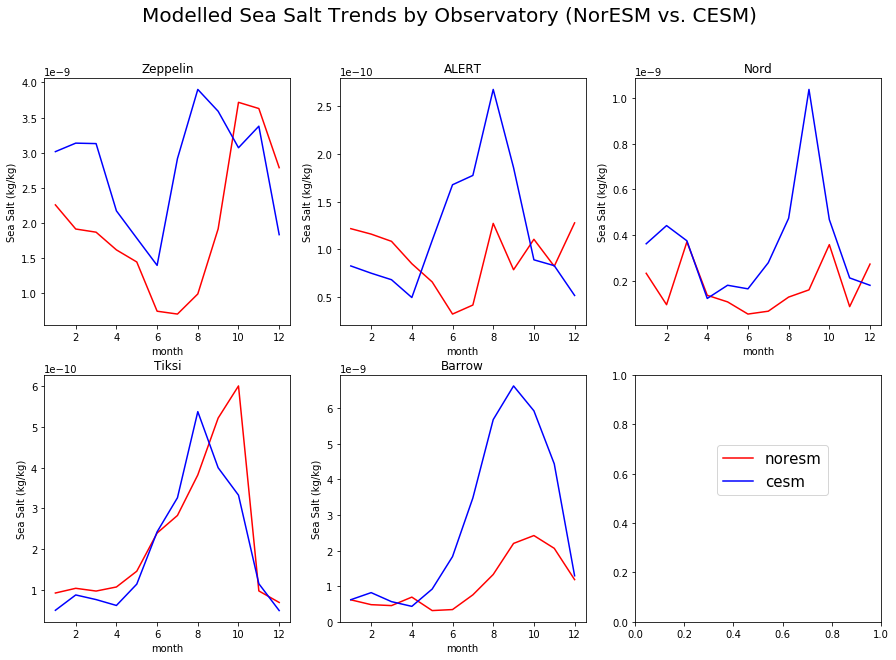

In [18]:
fig5, axs5 = plt.subplots(nrows=2, ncols=3, figsize=(15,10));
for ax, obs in zip(axs5.flatten(), obs_dict):
    temp_coords = obs_dict[obs]
    _ob_noresm = all_noresm['mmrss'].sel(lat=temp_coords[0], lon=temp_coords[1], method='nearest')
    _ob_cesm = all_cesm['mmrss'].sel(lat=temp_coords[0], lon=temp_coords[1], method='nearest')
    _ob_noresm.plot(ax=ax, color='r', label = 'noresm')
    _ob_cesm.plot(ax=ax, color='b', label = 'cesm')
    ax.set_title(obs)
    ax.set_ylabel('Sea Salt (kg/kg)')
fig5.legend(['noresm','cesm'], loc = [0.8,0.25], fontsize = 15)
fig5.suptitle('Modelled Sea Salt Trends by Observatory (NorESM vs. CESM)', fontsize=20);

In [19]:
filename = "ss_obs_comparison_2000_2010"
plt.savefig(base_dir + filename,format = 'png', dpi = 400)
plt.clf()

<Figure size 432x288 with 0 Axes>

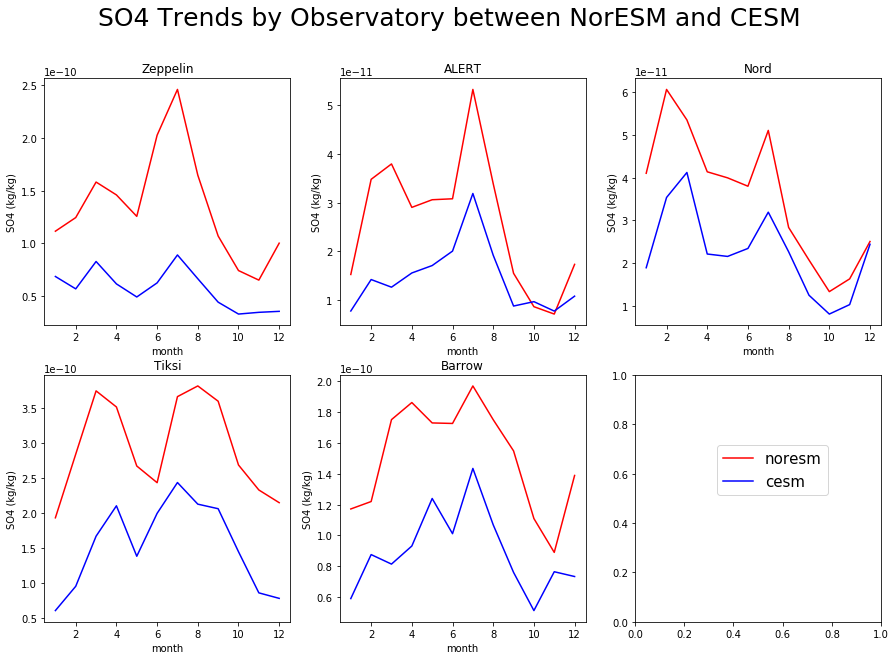

In [20]:
fig6, axs6 = plt.subplots(nrows=2, ncols=3, figsize=(15,10));
for ax, obs in zip(axs6.flatten(), obs_dict):
    temp_coords = obs_dict[obs]
    _ob_noresm = all_noresm['mmrso4'].sel(lat=temp_coords[0], lon=temp_coords[1], method='nearest')
    _ob_cesm = all_cesm['mmrso4'].sel(lat=temp_coords[0], lon=temp_coords[1], method='nearest')
    _ob_noresm.plot(ax=ax, color='r', label = 'noresm')
    _ob_cesm.plot(ax=ax, color='b', label = 'cesm')
    ax.set_title(obs)
    ax.set_ylabel('SO4 (kg/kg)')
fig6.legend(['noresm','cesm'], loc = [0.8,0.25], fontsize = 15)
fig6.suptitle('SO4 Trends by Observatory between NorESM and CESM', fontsize=25);

In [21]:
filename = "s04_obs_comparison_2000_2010"
plt.savefig(base_dir + filename,format = 'png', dpi = 400)
plt.clf()

<Figure size 432x288 with 0 Axes>